In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression

In [2]:
# Choose some points between

In [31]:
x1 = np.random.randn(1, 100)
x2 = np.random.randn(1, 100)

In [32]:
y = x1**2 + x2**2

In [33]:
y

array([[3.47239083, 4.42282901, 4.21407858, 2.7516288 , 2.13803632,
        2.06882136, 1.27583286, 2.31213217, 4.72186145, 1.23410604,
        0.75366109, 0.57789722, 1.02415979, 1.00658884, 4.41060339,
        3.2000839 , 0.16379845, 0.64138033, 1.06351747, 0.47306175,
        1.63815758, 4.89544315, 0.58112368, 0.63536761, 2.74945941,
        0.35943647, 1.99223798, 1.27291308, 1.20266342, 0.83005014,
        1.19470631, 1.94070185, 0.16425712, 1.18929871, 0.07472922,
        0.11680311, 1.56599736, 0.33932801, 0.56662577, 0.44892756,
        0.12082444, 0.27293938, 1.48124368, 0.10809541, 0.50383964,
        4.95945821, 2.76486974, 8.83471817, 0.57798533, 1.25214752,
        0.70698354, 1.98765281, 0.92239316, 1.52107843, 1.6046998 ,
        1.08475006, 0.56053701, 4.23191606, 9.1661372 , 7.30574435,
        1.34915055, 1.25193646, 2.44031791, 0.76108858, 1.6841538 ,
        1.82175687, 1.69873889, 0.34786574, 2.38494657, 1.25641317,
        1.04684832, 0.60245918, 1.68614393, 6.37

In [34]:
y[y>1] = 1
y[y<1] = 0

Text(0, 0.5, 'x2')

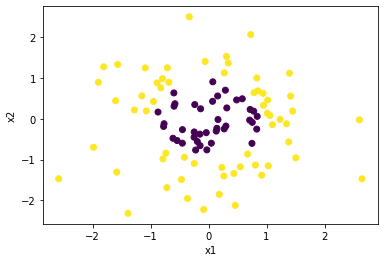

In [35]:
plt.scatter(x1, x2, c=y)
plt.xlabel("x1")
plt.ylabel("x2")

In [52]:
new_x = np.zeros((4, 100))


In [53]:
new_x[0] = x1
new_x[1] = x2
new_x[2] = x1**2
new_x[3] = x2**2

In [54]:
clf = LogisticRegression(penalty='none',solver='newton-cg')

In [55]:
clf.fit(new_x.T, y.T)

/Users/nipun/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
clf.coef_

array([[ -4.39982981,   5.62007231, 108.99837367, 102.79821996]])

In [61]:
new_x.T[:, 0]

array([ 0.18508995, -1.98333661, -1.58219046, -1.09070534,  1.44959787,
       -0.70892712,  0.93987981,  1.41524496,  0.45928229,  1.10149878,
        0.83080005, -0.54241727,  0.78298368,  0.94676094, -1.89876763,
        1.39553859, -0.14949852,  0.7786149 , -0.41700653, -0.57938473,
       -1.14928079, -1.80729382, -0.02942262, -0.22260903,  0.91579551,
        0.04792941,  0.33987936, -0.68316026,  0.67429322,  0.07339706,
        0.84959833,  0.80901513, -0.24695931, -1.07326618,  0.14372739,
       -0.03962761, -0.8867266 ,  0.15721158,  0.71689993,  0.48374888,
        0.29957495, -0.45003178,  0.23082226,  0.13291606,  0.70912142,
       -0.08384443, -1.602437  , -2.58351164,  0.29017408,  1.01945405,
        0.83860783,  0.43690143,  0.74852324,  1.23324433, -0.79425353,
       -0.95005392, -0.45140538, -1.56625951,  2.64581583, -1.3882888 ,
        0.271326  , -0.73594059,  0.30815258, -0.59772032, -1.27929933,
        1.34420103,  0.83250326, -0.19262112,  1.02877119, -0.82

In [70]:
X = np.vstack((x1, x2)).T
X.shape

(100, 2)

Text(0, 0.5, 'x2')

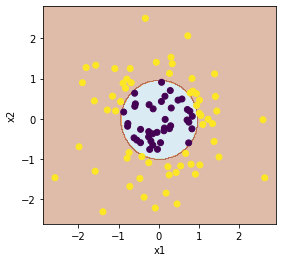

In [90]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 0.3, X[:, 0].max() + 0.3
y_min, y_max = X[:, 1].min() - 0.3, X[:, 1].max() + 0.3
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))





Z = clf.predict(np.c_[xx.ravel(), yy.ravel(), np.square(xx.ravel()), np.square(yy.ravel())])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.4)
plt.gca().set_aspect('equal')
plt.scatter(x1, x2, c=y)
plt.xlabel("x1")
plt.ylabel("x2")

In [91]:
Z.shape

(272, 292)

In [79]:
np.c_[xx.ravel(), yy.ravel(), np.square(xx.ravel()), np.square(yy.ravel())]

array([[-3.58351164, -3.31913746, 12.84155564, 11.01667347],
       [-3.56351164, -3.31913746, 12.69861518, 11.01667347],
       [-3.54351164, -3.31913746, 12.55647471, 11.01667347],
       ...,
       [ 3.59648836,  3.50086254, 12.93472855, 12.25603853],
       [ 3.61648836,  3.50086254, 13.07898809, 12.25603853],
       [ 3.63648836,  3.50086254, 13.22404762, 12.25603853]])

In [75]:
xx.ravel()

(123804,)

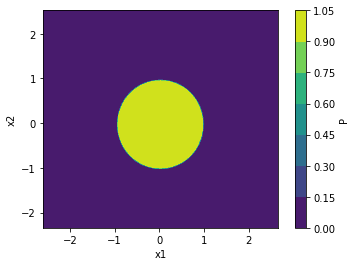

In [111]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - h, X[:, 0].max() + h
y_min, y_max = X[:, 1].min() - h, X[:, 1].max() + h
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))





Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel(), np.square(xx.ravel()), np.square(yy.ravel())])
# Put the result into a color plot
Z = Z[:, 0].reshape(xx.shape)
plt.contourf(xx, yy, Z,)
plt.gca().set_aspect('equal')
#plt.scatter(x1, x2, c=y)
plt.xlabel("x1")
plt.ylabel("x2")
plt.colorbar(label='P')


ValueError: cannot reshape array of size 272 into shape (272,292)

In [96]:
Z.shape

(79424, 2)

In [92]:
xx.shape

(272, 292)

In [94]:
Z.size

79424

In [99]:
Z[:, 0]

array([0., 0., 0., ..., 0., 0., 0.])